In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Importing

In [2]:
train_data=pd.read_csv(r'C:\Users\ashif\Desktop\DataScience\capstone_project\Loan_Prediction_AV\train_ctrUa4K.csv')
test_data=pd.read_csv(r'C:\Users\ashif\Desktop\DataScience\capstone_project\Loan_Prediction_AV\test_lAUu6dG.csv')
print(train_data.shape,' ',test_data.shape)

(614, 13)   (367, 12)


In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## EDA

In [5]:
# Statistical Summary

train_data.select_dtypes(include=['int64','float64']).describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
test_data.select_dtypes(include=['int64','float64']).describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
# Data Information

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


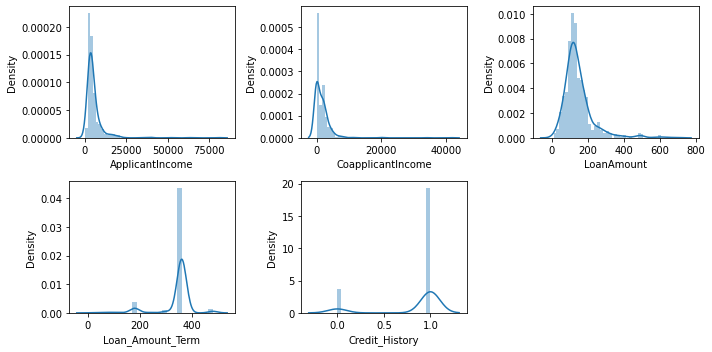

In [9]:
# Data Distribution Numerical Data

plt.figure(figsize=(10,5))
for i,j in zip(range(1,6),train_data.select_dtypes(['int64','float64']).columns):
    plt.subplot(2,3,i)
    sns.distplot(train_data[j])
    plt.tight_layout()

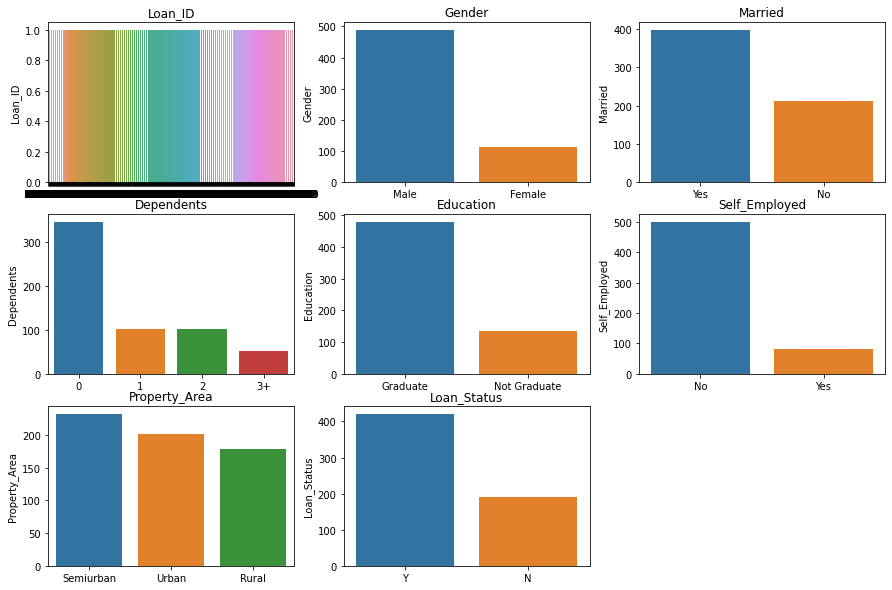

In [10]:
# Data Distribution Categorical Data

plt.figure(figsize=(15,10))
for i,j in zip(range(1,9),train_data.select_dtypes(include='object').columns):
    plt.subplot(3,3,i)
    sns.barplot(x=train_data[j].value_counts().index,y=train_data[j].value_counts())
    plt.title(j)

<AxesSubplot:>

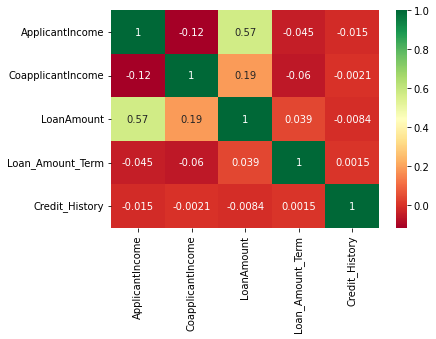

In [11]:
# Correlation

sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

It can be noticed that LoanAmount and ApplicantIncome is much correlated to each other.

## Null Value Treatment

In [12]:
# Checking Null Values

train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
# concating train and test data

concat_data=pd.concat([train_data,test_data])
print(concat_data.shape)
concat_data.iloc[610:618,:]

(981, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN


In [15]:
# again checking null values for categorical and numerical data separately on concated dataset

concat_data.select_dtypes(include=['int64','float64']).isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
dtype: int64

In [16]:
concat_data.select_dtypes(include=['object']).isnull().sum()

Loan_ID            0
Gender            24
Married            3
Dependents        25
Education          0
Self_Employed     55
Property_Area      0
Loan_Status      367
dtype: int64

In [17]:
# creating bins for Applicat Income Column

bins=[]
for j in concat_data.ApplicantIncome:
    if j<=10000:
        bins.append(10000)
    elif j<=20000:
        bins.append(20000)
    elif j<=30000:
        bins.append(30000)
    elif j<=40000:
        bins.append(40000)
    elif j<=50000:
        bins.append(50000)
    elif j<=60000:
        bins.append(60000)
    elif j<=70000:
        bins.append(70000)
    else:
        bins.append(80000)
concat_data['ApplicantIncome_Bins']=bins

In [18]:
# filling null values for numerical data

num_cols=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in num_cols:
    concat_data[i]=concat_data[i].fillna(concat_data.groupby(['ApplicantIncome_Bins'])[i].transform('mean'))

In [19]:
# checking value counts for categorical data

cat_cols=['Gender', 'Married', 'Dependents', 'Self_Employed']
for j in cat_cols:
    print(concat_data.groupby(['ApplicantIncome_Bins'])[j].value_counts().to_frame(),'\n\n')

                             Gender
ApplicantIncome_Bins Gender        
10000                Male       723
                     Female     169
20000                Male        39
                     Female      13
30000                Male         5
40000                Male         5
70000                Male         1
80000                Male         2 


                              Married
ApplicantIncome_Bins Married         
10000                Yes          586
                     No           324
20000                Yes           34
                     No            18
30000                No             4
                     Yes            3
40000                Yes            4
                     No             1
60000                Yes            1
70000                Yes            1
80000                Yes            2 


                                 Dependents
ApplicantIncome_Bins Dependents            
10000                0                  515
        

In [20]:
# filling null values for Gender Column

gen=[]
for i,j in zip(concat_data.ApplicantIncome_Bins.values,concat_data.Gender):
    if j is np.nan:
        if i<=80000:
            gen.append('Male')
        else:
            gen.append('Male')
    else:
        gen.append(j)
concat_data['Gender']=gen

In [21]:
# filling null values for Married Column

mar=[]
for i,j in zip(concat_data.ApplicantIncome_Bins.values,concat_data.Married):
    if j is np.nan:
        if i==30000:
            mar.append('No')
        else:
            mar.append('Yes')
    else:
        mar.append(j)
concat_data['Married']=mar

In [22]:
# filling null values for Dependents Column

dep=[]
for i,j in zip(concat_data.ApplicantIncome_Bins.values,concat_data.Dependents):
    if j is np.nan:
        if i<=40000 or i==70000:
            dep.append('0')
        else:
            dep.append('3+')
    else:
        dep.append(j)
concat_data['Dependents']=dep

In [23]:
# filling null values for Self_Employed Column

se=[]
for i,j in zip(concat_data.ApplicantIncome_Bins.values,concat_data.Self_Employed):
    if j is np.nan:
        if i<=80000:
            se.append('No')
        else:
            se.append('No')
    else:
        se.append(j)
concat_data['Self_Employed']=se

In [24]:
# Again CHecking for null values except for the Loan Status Column which need to predict

concat_data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status             367
ApplicantIncome_Bins      0
dtype: int64

In [25]:
concat_data.iloc[610:618,]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Bins
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.000000,Rural,Y,10000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.000000,Urban,Y,10000
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.000000,Urban,Y,10000
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.000000,Semiurban,N,10000
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.000000,Urban,NaN,10000
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.000000,Urban,NaN,10000
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.000000,Urban,NaN,10000
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.834129,Urban,NaN,10000


In [26]:
# Separating Train and Test Data Again

df_train=concat_data.iloc[:614,:].drop(['Loan_ID','ApplicantIncome_Bins'],axis=1)
df_test=concat_data.iloc[614:,:].drop(['Loan_ID','ApplicantIncome_Bins','Loan_Status'],axis=1)

In [27]:
df_train.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [28]:
df_test.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,0.834129,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.000000,Rural
366,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.000000,Rural


## Encoding Categorical Data

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for k in train_cat_cols:
    df_train[k]=le.fit_transform(df_train[k])
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,132.750281,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [30]:
test_cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
for m in test_cat_cols:
    df_test[m]=le.fit_transform(df_test[m])
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,0.834129,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777.0,113.0,360.0,1.000000,2
363,1,1,0,0,0,4158,709.0,115.0,360.0,1.000000,2
364,1,0,0,0,0,3250,1993.0,126.0,360.0,0.834129,1
365,1,1,0,0,0,5000,2393.0,158.0,360.0,1.000000,0


## Scaling

In [31]:
x=df_train.drop('Loan_Status',axis=1)
y=df_train[['Loan_Status']]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
df_test_scaled=sc.transform(df_test)

In [32]:
np.round(pd.DataFrame(x_scaled).describe())

,0,1,2,3,4,5,6,7,8,9,10
count,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-2.0,-5.0,-2.0,-1.0
25%,0.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,0.0,0.0,-1.0
50%,0.0,1.0,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
75%,0.0,1.0,0.0,-1.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,1.0,2.0,2.0,3.0,12.0,14.0,7.0,2.0,0.0,1.0


## Feature Extraction

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_transformed=pca.fit_transform(x_scaled)
df_test_transformed=pca.transform(df_test_scaled)

In [34]:
print(x_scaled.shape,x_transformed.shape,df_test_scaled.shape,df_test_transformed.shape)

(614, 11) (614, 10) (367, 11) (367, 10)


## Data Modeling

In [53]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [59]:
# Logistic Regression

lr=LogisticRegression()
folds = KFold(n_splits = 15, shuffle = True, random_state = 42)
scores = cross_val_score(lr,x_transformed, y, scoring='accuracy', cv=folds)
print(scores,'\n',np.mean(scores))

[0.85365854 0.65853659 0.85365854 0.75609756 0.90243902 0.7804878
 0.85365854 0.82926829 0.85365854 0.80487805 0.7804878  0.75609756
 0.87804878 0.68292683 0.9       ] 
 0.8095934959349596


In [60]:
# Naive Bayes

nb=GaussianNB()
folds = KFold(n_splits = 15, shuffle = True, random_state = 42)
scores = cross_val_score(nb,x_transformed, y, scoring='accuracy', cv=folds)
print(scores,'\n',np.mean(scores))

[0.85365854 0.65853659 0.82926829 0.73170732 0.90243902 0.80487805
 0.87804878 0.75609756 0.7804878  0.7804878  0.85365854 0.65853659
 0.82926829 0.68292683 0.8       ] 
 0.7866666666666668


In [61]:
# SVM

svm=SVC()
folds = KFold(n_splits = 15, shuffle = True, random_state = 42)
scores = cross_val_score(svm,x_transformed, y, scoring='accuracy', cv=folds)
print(scores,'\n',np.mean(scores))

[0.85365854 0.68292683 0.85365854 0.73170732 0.87804878 0.7804878
 0.85365854 0.80487805 0.85365854 0.7804878  0.7804878  0.75609756
 0.87804878 0.68292683 0.9       ] 
 0.8047154471544717


In [62]:
# Random Forest

rf=RandomForestClassifier()
folds = KFold(n_splits = 15, shuffle = True, random_state = 42)
scores = cross_val_score(rf,x_transformed, y, scoring='accuracy', cv=folds)
print(scores,'\n',np.mean(scores))

[0.80487805 0.65853659 0.87804878 0.80487805 0.87804878 0.82926829
 0.7804878  0.80487805 0.73170732 0.65853659 0.75609756 0.73170732
 0.85365854 0.70731707 0.825     ] 
 0.7802032520325203


In [63]:
# Gradient Boosting

gb=GradientBoostingClassifier()
folds = KFold(n_splits = 15, shuffle = True, random_state = 42)
scores = cross_val_score(gb,x_transformed, y, scoring='accuracy', cv=folds)
print(scores,'\n',np.mean(scores))

[0.7804878  0.68292683 0.82926829 0.7804878  0.85365854 0.82926829
 0.75609756 0.70731707 0.80487805 0.75609756 0.73170732 0.73170732
 0.82926829 0.70731707 0.8       ] 
 0.7720325203252033


Hence, from the above results it can be concluded that Logistic Regression is giving the best accuracy.

## Final Submission

In [75]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C' : np.logspace(-4, 4, 20),
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,2500, 5000]}
tuning=GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,
                    scoring='accuracy',verbose=2,cv=2)
# tuning.fit(x_transformed,y)
# tuning.best_params_
# {'C': 0.08858667904100823,
#  'max_iter': 100,
#  'penalty': 'l1',
#  'solver': 'liblinear'}

In [76]:
# Logistic Regression Model

lr_model=LogisticRegression(penalty='l1',C=0.08858667904100823,max_iter=100,solver='liblinear')
lr_model.fit(x_transformed,y)
y_pred=lr_model.predict(x_transformed)
print(metrics.accuracy_score(y,y_pred))

0.8110749185667753


<AxesSubplot:>

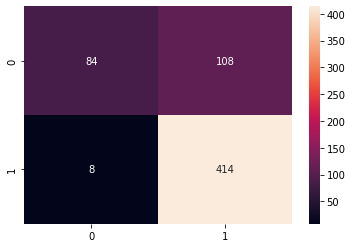

In [83]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y,y_pred),annot=True,fmt='0.3g')

In [86]:
# Classification Report

print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



In [97]:
# submission

final_pred=lr_model.predict(df_test_transformed)
mappings = {1: 'Y', 0: 'N'}
Loan_Status=[mappings[i] for i in final_pred]
Loan_ID=test_data.Loan_ID.values

In [98]:
sub=pd.DataFrame({'Loan_ID':Loan_ID,'Loan_Status':Loan_Status})
sub

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [100]:
# sub.to_csv('submission.csv',index=False)